[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mayo-Radiology-Informatics-Lab/MIDeL-Chapters/blob/main/chapters/Section_4_First_Steps_to_Writing_Your_First_Python_Program.ipynb)

*Author: Bardia Khosravi, M.D.*

# 1. **Introduction**

In order to utilize deep learning in a medical imaging project, there are three pre-requisites:

1.   Representative data
2.   *Programming skills* to code a model that can learn from the data
3.   *Powerful hardware* that can speed up the learning process

In this chapter, we will discuss how to circumvent the need for *advanced programming skills* and *powerful hardware* at the beginning of our journey. Needless to say, as you advance through these series you will get to use more advanced techniques and might need higher performance hardware.

For this current series, we use Google's **Colab Notebook** as a means of content delivery method and a programming environment. Colab is a hosted coding environment that gives you free access to powerful hardware (Graphical Processing Unit or GPU) that is required to train most deep learning projects in reasonable times (and if complex enough, it still may not be adequate). If you have previously worked with *Jupyter Notebooks* or *IPython Notebooks* you are almost ready to work with Colab notebooks (from here on simply referred to as *notebooks*). If you are new to notebooks, we will cover the basics of them here.

At this time, **Python** is the most popular programming language for deep learning. In this section, we assume you know the basics of Python programming and know how to work with some of its libraries such as *Pandas*, *Numpy*, and *Matplotlib*. Later in this section, we will do a quick overview of some of the necessary functionalities of Python and these libraries.

Before jumping into the coding part, we should mention that all the libraries and frameworks we will use are open-source and are under active development. So it may be the case that some of the code in this section might not work as described by the time you read it. To prevent this, we strongly recommend that you use the following versions for each of the packages/libraries. But we also encourage you to experiment, as that is the best way to learn!

Name | Version
--- | ---
Python | 3.8
gdown | 3.13.0
Pillow | 8.3.1
Matplotlib | 3.4.3
Numpy | 1.21.2
Pandas | 0.25.0



# 2. **Notebooks**

## 2.1. **Basics of Colab**

Notebooks provide an easy-to-use Python coding environment. To create a new notebook, just head to [colab.research.google.com](https://colab.research.google.com) and click on the *New notebook* button, just like the image below. Note that you have to sign-in to your Google account to gain access and to save your work.

<br><img src="https://i.ibb.co/Bncrd8N/Screen-Shot-2021-08-01-at-9-54-53-PM.png" alt="Figure 1" style='margin:auto' border="0"><u><b>Figure 1.</b> Creating a new notebook in Colab environment</u><br><br>

After doing this, an empty notebook will open up for you. Figure 2 demonstrates different sections of a notebook. By clicking on the title of the notebook, you can rename it. As you can see, notebooks have a *.ipynb* extension (which reflects its IPython NoteBook heritage) and can be opened with other notebook environments such as *Jupyter Notebooks*, *Visual Studio Code*, and *PyCharm*. In order to export your notebook to open it offline, on the toolbar, click on *File -> Download -> Download .ipynb*.

---


> **Note**: To use the free powerful hardware provided by Google, just click on *Connect* in the accelerator button. You can change the type of accelerator (CPU, GPU, or TPU) using the same section, or from the top toolbar and *Runtime -> change runtime type* either now or later. The provided codes will run in CPU mode but usually is much slower. TPUs are special processors created by Google and can be faster than GPUs but typically require special code setup, which is not covered here. For that reason, you should generally select 'GPU' runtimes.


---

<br><img src="https://i.ibb.co/z2Pj8Zq/Figure-2.png" alt="Figure 2" style='margin:auto' border="0"><u><b>Figure 2.</b> Different sections of a notebook.</u><br><br>

You can use the left sidebar to view the table of contents of your code and also browse your data from Google Drive or even upload it right away. Just bear in mind that if you close your notebook all the files you load to the colab server such as data files (**but not your notebook and those files on Google Drive**) will be deleted. It is recommended that you store your project's files on the Google Drive so you can access them all the time.

In order to connect to your Google Drive, you can choose the *folder icon* on the left sidebar and select Google Drive, or you can run the following cell. Follow the onscreen URL, copy the personalized token, and paste it in the designated field, so that the notebook gains access to your files. Note that you can access publicly shared files using commands like `wget` or Google's special `gdown` command to transfer data from an internet server to the colab notebook. Throughout this series we will use these commands to get appropriate data into our notebooks.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here you can see that your drive is attached (*mounted*) at */content/drive/MyDrive* on your colab computer. You can use the file sidebar to browse through your Google drive files. It is critical to understand at this point that you are accessing a computer running in Google's cloud servers, and that to access data, you can either transfer data to it, or *mount* a Google drive folder. The former will typically be faster to access, but the latter may be easier to access, and if you write results back to it, the latter will be visible in your Google Drive after you log out of your colab session.

---


> **Exercise 1**: Select the '/content/' folder and find the 'sample_data' folder and rename it. See how you can upload a new file or copy the path of a folder for ease of use.


---

Last but not least, the coding area of a **notebook** is comprised of blocks that are called *cells*. Notebooks have two types of cells: *code* cells and *text* cells (sometimes referred to as *markdown* cells). 
**Code cells** contain Python code. Code cells have a *play* button in the left upper corner that differentiates them visually from text cells (see Figure 2). Each code cell can be executed independently from others and the output is visualized individually. Furthermore, you can alter the code in a cell and run it again. The program state is saved all along, so all the variables that have been set in prior cells are valid for the current cell. This ability to run parts of a program is very useful for long programs, as you can debug your code as you write it and pinpoint any error as it happens.

---


> **Note**: If you change the value of a variable using code in that cell, and you re-run the cell, the variable's value will change and the variable is NOT restored to its value before you ran the current cell. Therefore you may want to have a code snippet that initializes values at the start of a cell, but if you alter a variable's previously calcualted value, you will get unreliable results. *Caveat Emptor!*


---

**Text cells** are used for organizing and documenting your code. The text in these cells is written in markdown language and can be formatted to look more structured. This text that you are currently reading is actually written in a text cell. Just double-click here to see what is written in the cell. When you move your cursor between the cells, you see the option to add either of these cell types in that location. You can remove a cell by selecting it (i.e. clicking on it) and selecting the trash icon on the right side of it. Double-clicking it will open the cell for editing without having to click to select it and then click on the edit icon (the pencil).

We also note here that the output of code from a cell is also included in a notebook if you run it and then save the output (e.g. as a PDF or HTML file). We typically do that here with our examples so you can see what the output should look like. However, as soon as you (re)run a cell, that output is overwritten.

---


> **Note**: If you wish to edit an existing text cell, you need to double-click it, whereas you only need to single click a code cell to focus on it for editing.


---

---


> **Exercise 2**: Add a text block above this cell and type in your name in bold face (using the text editor options provided). Next add a code cell below the current cell and print out "Hello world!" using Python's `print` function by typing `print("Hello world!")` and running the code cell.


---

Let's refresh our Python coding skills before diving into the deep learning code.

## 2.1. **Python Review**

The purpose of this section is to **review** some coding practices in Python. If you find the content of this section is beyond your knowledge, we recommend you pause and first go through a Python tutorial course or book. Refer to *Part 6* of this chapter for a list of recommended courses.

### 2.1.1. *Lists and Tuples*

Python lists are a collection of values that can be of any type. For example, one value can be a string another can be a float and another can be a custom object. Here are some examples of basic variable assignments using a few common data types:

In [ ]:
patient_age = 52       # integer
modality = "CT"        # string
slice_thickness = 0.5  # float

You create a list by putting values between `[]` and separating them using a comma (`,`) like:

In [ ]:
test_list = [52, "Female", "CT", "Abdomen"]

Items of a list can be accessed using their *index*. Indexes start from zero, so to select "Female" from the `test_list`, you would use:

In [ ]:
test_list[1]

'Female'

One feature of notebooks is that if you simply select a value like `test_list[1]`, it will print it out but only one time. In a traditional programming environment, this statement would do nothing, and you would have to use `print(test_list[1])` to print out the value. 
In addition to values from 0 up to the length of the list, we can use negative indices to index from the end of the list, in which case, `-1` corresponds to the last item of a list and it goes on:

In [ ]:
test_list[-3]

'Female'

You can access several items of a list at once using *slicing*. You specify the starting index (inclusive) and the end index (non-inclusive). For example, you can index `test_list`:

In [ ]:
test_list[1:-1]

['Female', 'CT']

You can also specify an interval to 'skip' between indices:

In [ ]:
test_list[0:-1:2]  # or start=0, end=1, step=2

[52, 'CT']

If you want to go through a list backwards, you need to use a negative skip value like this:

In [ ]:
test_list[-1:1:-1]

['Abdomen', 'CT']

You don't have to specify `0` as the start or an end value. You can simply have no value before (or after) the `:` character. So to print out the first two values you can do that as follows:


In [ ]:
test_list[:2]

[52, 'Female']

Or if you want the last two values you can use:

In [ ]:
test_list[-2:]  # or test_list[2:]

['CT', 'Abdomen']

You can assign new values to each index of a list or you can add values to the end of it using the`.append()` method:

In [ ]:
test_list[2] = "MRI"       # replacing CT with MRI
test_list.append(0.5)      # adding 0.5 at the end of a list

print("New List Items:",test_list)
print("New List Length:", len(test_list))

New List Items: [52, 'Female', 'MRI', 'Abdomen', 0.5]
New List Length: 5


You can also loop through a list using a `for` loop:

In [ ]:
for item in test_list:
    # note again you have to explicitly print values unless it is alone and in the last line
    print(item)

52
Female
MRI
Abdomen
0.5


Sometimes you need both the value of the item and its index. One could just set a counter variable to 0 at the start and increment it each loop, but Python has a quicker way: one can `enumerate` the list so you get both the index and value of each item, like:

In [ ]:
for index,value in enumerate(test_list):
    print(f"index {index}:",value)

print ("\nAnd now the old way:")
# compared to the old way:
index = 0
for item in test_list:
    print(f"index {index}:",item)
    # += is short hand way to add a value to a variable and is the same as index = index + 1
    index += 1

index 0: 52
index 1: Female
index 2: MRI
index 3: Abdomen
index 4: 0.5

And now the old way:
index 0: 52
index 1: Female
index 2: MRI
index 3: Abdomen
index 4: 0.5


Tuples are just like lists with one exception, they are immutable, which means that you can not change the values of its items. You can create tuples by putting `,` between the values. It is generally recommended though, to put the values between `()` just to make it clearer:

In [ ]:
test_tuple = 4, 8, 15, 16, 23, 42 
# or
test_tuple = (4, 8, 15, 16, 23, 42)

One of the use cases for tuples is for returning values from a function. Actually the `index, value` in the `enumerate(test_list)` example, is a tuple. Here is another example:

In [ ]:
from datetime import datetime    # for getting date and time
from typing import Tuple         # for type hinting in future functions

def parse_date(date:datetime)-> Tuple[int,int,int]:
    """
    This is a function that parses a date into integers of day, month and year.

    Args:
        date: A datetime object that needs to be parsed.

    Returns:
        A tuple of parsed day, month and year.
    """

    day = date.day             # .day is a method of the date object (discussed later)
    month = date.month         # .month is a method of the date object (discussed later)
    year = date.year           # .year is a method of the date object (discussed later)

    return day, month, year    # here we return a tuple of three integers

now = datetime.now()           # date object (discussed later)
today_day, today_month, today_year = parse_date(now) # here we store each item of the tuple in an item of another tuple

Note that `today_day, today_month, today_year` is itself a tuple of three items.

One thing that might be new to you is *type hinting* which are the ":" (colon character) in the parameter list and the "->" in the function declaration. This is a new feature of Python (as of version 3.8) and is valuable to help the computer help you reduce bugs. By specifying what the function should receive and return, the computer can hint as you write code what the types should be. 
For example, the `parse_date` function gets an input of type `datetime` (which we imported in this chapter's code cell) and returns a tuple made up of three integers (day, month, year).

---


> **Practical Note**: Colab notebooks have the functionality to auto-complete your code, which can be very helpful. To use this function, go to a code cell and press the `alt/option` + `esc` keys of your keyboard to show its suggestions.

---

---


> **Practical Note**: Colab notebooks can also show you the documentation  of each function, named *docstring*. To summon this guide, go inside the parentheses `()` of a function and press the `tab` key. You can test it with the `parse_date` function we just wrote above. Create a new code cell below this cell, and type `parse_date()` and go inside the parentheses and press the `tab` key.
 This does require that a docstring exist for the source code of that function. We will describe how to create docstrings, and some more capable editors (like PyCharm) will prompt you to create a docstring when you define a function.


---

### 2.1.2. *Dictionaries*

Dictionaries, just like lists, are a collection of values with one important difference. With dictionaries, the indices are strings, called *keys*, rather than integers. Just like a dictionary that you might use for translations in which you look for the definition of a word, in a Python dictionary values are assigned to keys. You can create a dictionary by specifying key-value pairs within `{}`, like:

In [ ]:
test_dict = {
    "Patient Age": 52,
    "Patient Sex": "Female",
    "Modality": "CT",
    "Body Part": "Abdomen",
    "Slice Thickness": 0.5
}

print("Patient Age:", test_dict['Patient Age'])

Patient Age: 52


You can easily assign new key-value pairs or even update them:

In [ ]:
test_dict["Modality"] = "MRI"         # changed the "Modality" key to "MRI"
test_dict["Manufacturer"] = "Siemens" # inserted a new key named "Manufacturer"

print(test_dict)

{'Patient Age': 52, 'Patient Sex': 'Female', 'Modality': 'MRI', 'Body Part': 'Abdomen', 'Slice Thickness': 0.5, 'Manufacturer': 'Siemens'}


You can loop through a dictionary based on its key values:

In [ ]:
for key in test_dict:
    print(f"key '{key}':",test_dict[key])

key 'Patient Age': 52
key 'Patient Sex': Female
key 'Modality': MRI
key 'Body Part': Abdomen
key 'Slice Thickness': 0.5
key 'Manufacturer': Siemens


Also, you can get all the values and keys and convert them to a list:

In [ ]:
test_dict_keys = test_dict.keys()
test_dict_values = test_dict.values()

print("keys:", list(test_dict_keys))
print("values:", list(test_dict_values))

keys: ['Patient Age', 'Patient Sex', 'Modality', 'Body Part', 'Slice Thickness', 'Manufacturer']
values: [52, 'Female', 'MRI', 'Abdomen', 0.5, 'Siemens']


Note that Python does not guarantee the order of entries in a dictionary. You must access them using keys and you cannot access them using numerical indices.


## 2.2. **Classes & Object Oriented Programming**

As part of the trend of object-oriented programming in python, we should know how to write **classes** and work with them. This will come in handy when working with PyTorch and MONAI. 

First, let's write a simple `StatMeter` class and then go through each line of the code to understand what is happening. A `StatMeter` is a simple class that can be used to calculate the running average and standard deviation of a series of numbers.

In [ ]:
import math       # for calculating square root of variance

class StatMeter():
    """
    A simple class to get the statistics of a series of numbers.
    """
    def __init__(self, rounding_digits=2):
        """
        Initialization function.

        Args:
            rounding_digits: number of digits that the result is rounded to.
        """
        self.numbers = list()
        self.rounding_digits = rounding_digits
        self.mean = None
        self.std = None
    
    def add(self, number):
        """
        Adds a number to the class radar and updates the values of the class based on the newly added number.

        Args:
            number: a new number to be tracked by the class.
        """        
        self.numbers.append(number)

        self.update_mean()
        self.update_std()

    def update_mean(self):
        """
        Calculate and update the mean of the numbers.
        """
        numbers_count = len(self.numbers)
        numbers_sum = sum(self.numbers)
        mean = numbers_sum/numbers_count

        self.mean = mean

    def update_std(self):
        """
        Calculate and update the standard deviation of the numbers.
        """
        numbers_count = len(self.numbers)
        mean_diff_sq_list = []
        for number in self.numbers:
            mean_diff_sq_list.append( (number-self.mean)**2 )
        
        mean_sq_diff_sum = sum(mean_diff_sq_list)

        variance = mean_sq_diff_sum/numbers_count
        std = math.sqrt(variance)    # or we can variance**0.5

        self.std = std

    def print_stats(self):
        """
        Prints the results based on the `rounding_digits` specified at initialization.
        """
        print("Mean:", round(self.mean, self.rounding_digits))
        print("Std:", round(self.std, self.rounding_digits))

In order to understand this class, let's walk through an example. Suppose that we want to calculate the mean and standard deviation of a group of 10,343 patients so that we can *normalize* it (more on normalization in future chapters). We generate these ages at random and use our `StatMeter` class to track these values.

In [ ]:
import random     # for creating random numbers

patient_ages = [random.randint(18,99) for _ in range(10343)]   # this will create a list of 10,343 random numbers between 18 and 99 (ages)

age_meter = StatMeter(rounding_digits=3)          # initialize an instance of StatMeter with the parameter rounding_digits set to 3

for age in patient_ages:
    age_meter.add(age)           # adding each age to the age_meter

age_meter.print_stats()

Mean: 58.256
Std: 23.632


Seeing this example can help us better understand how a class works. First, we have to *initialize* an *instance* of a class. Each instance of a class, also called an object, is completely separate from other instances. For example, if we want to have another `StatMeter` for getting the statistics of the patients' blood pressure, we would have typed `bp_meter = StatMeter()`. This keeps the values of age and blood pressure separate, which is probably a good thing! 

When an instance is created (*instantiated* in computer-speak), Python calls the `__init__()` *method* (functions of a class are called methods) of that class. In our example, `__init__()` gets only one external value, `rounding_digits`. Note that class methods almost always get `self` as their first parameter (look at the `add()` and `update_mean()` methods). This `self` parameter gives you control over local variables of that class and passes these variables between methods. For example, `self.mean` or `self.rounding_digits` are local variables to our object. 

---


> **Practical Note**: In the previous code cell, note the use of the square brackets (`[]`) to create the `patient_ages` list. This is called a *list comprehension* and is a quick and easy way to create a list using the code within the square brackets. In the above case, note also the use of '_' which essentially indicates that it is a throw-away variable (not used). So the code in the brackets will generate a list of 10,343 random values that are between 18 and 99.


---

Let's check these internal variables of our class by replacing `self` with the name of the object:

In [ ]:
print("rounding_digits:", age_meter.rounding_digits)
print("mean:", age_meter.mean)
print("std:", age_meter.std)

rounding_digits: 3
mean: 58.25582519578459
std: 23.631789604108814


Next, we call the `add()` method. By inspecting the source code of the method, we see that it gets a number, in our case *age*, and adds it to the list of `numbers` of the object. Afterward, it calls the `update_mean()` and `update_std()` methods to update the mean and standard deviation of the numbers after each update. Note that the assumption is that a list already exists, so __init__ is necessary to create the list with no entries.

Finally, we can call the `print_stats()` method to print our results with the `rounding_digits` specified when initializing the object.

---


> **Practical Note**: In the `StatMeter` class code, note the use of triple quotes (`"""`) after each method is defined. This is the start of the docstring, we discussed earlier. The first part describes the function, and subsequent parts describe each of the parameters that are supplied to it. This is how Python can provide hints about what a function does and what the parameters mean.


---

---


> **Exercise 3**: Add three new methods to the object so that it can also report the minimum, maximum, and median of the values. You can name them `update_min()`, `update_max()` and `update_median()`. Don't forget to update the `print_stats()` method accordingly. Also, add appropriate docstrings to your methods.


---

To save an object in Python we can *pickle* it! Pickle is a special storage form that saves the local variables and structure of your object. Throughout this series, we will have situations in which we work on code in one chapter, pickle some objects, and load the pickled objects in another chapter to continue our work. This is how we pickle our `age_meter` object:

In [ ]:
import pickle     # for pickling our object

with open(r"age_meter.pickle", "wb") as output_file:
    pickle.dump(age_meter, output_file)

For loading an already saved pickle, we can do the following:

In [ ]:
import pickle     # for unpickling our object

with open(r"age_meter.pickle", "rb") as input_file:
    age_meter_copy = pickle.load(input_file)

Just to make sure that the local variables are stored, let's check them and compare them with the unpickled versions:

In [ ]:
print("rounding_digits:", age_meter_copy.rounding_digits)
print("mean:", age_meter_copy.mean)
print("std:", age_meter_copy.std)

rounding_digits: 3
mean: 58.25582519578459
std: 23.631789604108814


You see that they are the same! It's safe to say that we can use this method to transfer *knowledge* from chapter to chapter! A more subtle thing is that the loaded object knows not only its values but also its methods!

---


> **Security Note**: Only load pickle files that you create and do not trust third-party sources. As we noted, they contain not only data but also methods and those methods can run malicious code while loading.
 


---

# 3. **Local Notebooks**

So far, everything we have done was in the Colab environment. But what if we want to use our own computers and resources?

Well, first let's go through the pros and cons of this decision. One big advantage that Colab provides is access to free accelerators such as GPUs and TPUs. We need this hardware for training our deep learning models on medical images. With this accelerator, we get a 20-100x speed boost in our training process compared to CPUs. On the other hand, using your local machine for creating the initial version of the code (apart from training your model) can be a wise choice and also means your data does not need to be loaded onto Google computers (which might be a security/privacy concern). 

---


> **Note**: If you want to continue this series in Colab, you can jump to *Part 4*.


---

To run a notebook on your machine, you must install Python, Jupyter notebook, and several other *packages*. To facilitate this process we recommend using **Anaconda**, a program that automatically takes care of almost all of the steps for installing a notebook environment on your local machine, regardless of which operating system you are using. To install Anaconda, click on [this link](https://www.anaconda.com/products/individual-d) and download the latest available version for your operating system. 

---


> **Installation Note**: During the setup process, after selecting the destination folder, you will be asked whether to <u>*add anaconda to your PATH*</u>. Be sure to check this box, as this will make everything much easier during this series.
 


---

After installing Anaconda, it's time to start your notebook.

## 3.1. **Starting Jupyter Notebook**

Jupyter notebook should already be installed on your machine. To start it all you need to do is open up **Terminal** (for macOS and Linux) or **Command Prompt** (for Windows). All you need to do now is to type `jupyter notebook` in the opened window!

---


> **Note**: If you have not added python to your path, you can search for **Anaconda Prompt** and use it for running your commands when working with Python.


---

<br><img src="https://i.ibb.co/ZM8nWNf/Jupyter.jpg" alt="Figure 3" style='margin:auto' border="0"><u><b>Figure 3.</b> Jupyter Notebook</u><br><br>

Now your browser should open and show all of your root files listed. But as you see, the root directory is usually a very messy place that makes locating your files really difficult. You can navigate through the folders to find a familiar place, like your *Desktop*. Or, you can use your terminal/cmd prompt *(we will call both of them terminal from now on)* to change where to start your Jupyter notebook server.

Let's create a folder on our desktop named *MIDeL*. To use this folder as the notebook's starting point, close your browser. Then open a new terminal window and type in `cd ` (note there is a space at the end). Now all you need to do is to drag and drop the *MIDEL* folder onto your terminal window and press *enter*. You should see the folder path being typed for you in the next line. All that is left is to type the `jupyter notebook` command in your terminal window and you can see the notebook starts in your intended folder.

We will return to what `cd` means in *Part 5* of this chapter. So for now, just knowing that it stands for *change directory* will suffice.

## 3.2. **Environments**

As you might have guessed, there are quite a few packages that you need to install for your deep learning projects. Packages are a collection of python files that can be *imported* in your code. These packages have some functions and classes ready that you can use in your code without the need to code them yourself. The collection of packages make a library and a collection of libraries make a framework. There is a thin border between these entities so we won't bother with differentiating them. We will call them *packages* from here on.

Each package might need other packages as a *dependency* to work correctly. You can imagine that things could easily get out of hand if there is a conflict between packages and ruin your work! To solve this problem, we use **environments**. Each environment is a separate collection of packages, where you can install packages and test them before moving into your *main* environment.

To create a new environment, you need to open up a new terminal window and type in:

```
conda create --name MIDEL python=3.8
```

This will create a new environment named "MIDEL" with python version 3.8 already installed. Now you can switch to this new environment whenever you want just by typing `conda activate MIDEL` in your terminal. Hereafter, we will work in this MIDEL environment and install all the packages that we want in this environment. After switching to the MIDEL environment, you can see that the lines in your terminal start with `(MIDEL)`, like in **Figure 4**.

<br><img src="https://i.ibb.co/dfM5jdY/MIDEL-Env.jpg" alt="Figure 4" style='margin:auto' border="0"><u><b>Figure 4.</b> Activating MIDEL Environment</u><br><br>

For a complete list of what you can do using Anaconda, we highly recommend that you check out the *Conda Cheatsheet* linked in *Part 6* of this chapter.

Let's install the first package to our environment. Throughout this series, we will download a lot of files from Google Drive. Let's download a package to do things more automatically. To install packages, we can use `conda` itself or `pip`. Most of the packages we will work with are hosted on `pip`. You can go to [pypi.org](https://pypi.org) and search for a specific package if you want. But for now, we want to install `gdown` package that can facilitate file downloading from Google Drive. After switching to our **MIDEL environment**, we can type the following command:

```
pip install gdown==3.13.0
```

This command installs version `3.13.0` of the `gdown` package. We will use this package further down the road.

We will continue this chapter by installing Pillow, Numpy, and Pandas, three useful packages that will definitely come in handy during your deep learning projects!



# 4. **Other Python Packages**

## 4.1. **Visualizing Images**

As you are reading this series, we will be opening images and working with them. So to start, let's download a simple image and open it with python! Before we start, we need to install two packages:

1.   Pillow: a package for opening images and manipulating them
2.   Matplotlib: a package for plotting different charts and viewing images

To install these packages you need to install them in your **MIDEL environment** by typing the following command in your terminal:

```
pip install pillow==8.3.1 matplotlib==3.4.3
```

This will install the intended versions of the mentioned libraries.

---


> **Note**: If you are viewing this chapter in Colab, these packages are already installed and you can skip the preceding line.


---

Now let's open a file with pillow. First we have to download the image:

In [ ]:
import gdown   # for downloading files from google drive

image_url = "https://drive.google.com/uc?id=1rwHa73dLA7mFhjbP01nGx9pK8sX9T8jH&export=download"
image_name = "sample_cxr.jpg"
gdown.download(image_url, image_name, quiet=True)

'sample_cxr.jpg'

Now the image should be saved in your local machine or Colab file system (in the *'content'* folder). Now let's view this image:


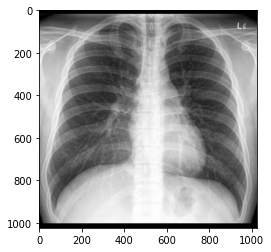

In [ ]:
from PIL import Image   # PIL is the package name for pillow and Image is the main module for image handling
import matplotlib.pyplot as plt   # for visualizing images

image_file = Image.open(image_name)
plt.imshow(image_file);

You see a nice image of a chest x-ray ([source](https://radiopaedia.org)) with a resolution of 1024 by 1024 pixels. Now we can resize this image to 512*512px:

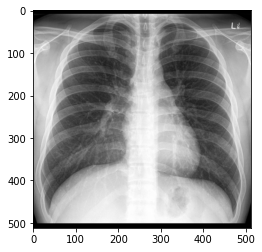

In [ ]:
image_file_small = image_file.resize((512,512)) # We pass the desired width and height of the new image, respectively, as a tuple
plt.imshow(image_file_small);

We can save this resized version using the following line of code. We can even change the extension from *jpg* to *png*. 

In [ ]:
image_file_small.save("sample_image_small.png")

Let's move on to using Numpy!

## 4.2. **Working with Arrays**

Numpy (short for numeric python) is a package for doing multi-dimensional computations in python. In the context of computer vision, images and videos are regarded as multi-dimensional data. Numpy works with a special type of data that is called *array*. Arrays are like Python lists with two main differences: 

1.   All members of an array must be of the same type (integer, float, boolean) 
2.   Members of an array can themselves be an array but they need to have the same size as each other.

Numpy is highly optimized for numerical computations and can be 10-100 times faster than using python's native alternatives. To start working with Numpy, let's first install Numpy in our environment:

```
pip install numpy==1.21.2
```

---


> **Note**: If you are viewing this chapter in Colab, these packages are already installed and you can skip the preceding line.


---

Let's create an array from a simple Python list:

In [ ]:
import numpy as np   # by convention we import numpy as np

demo_array = np.array([4, 8, 15, 16, 23, 42])
print(demo_array)

[ 4  8 15 16 23 42]


You can see there is not much difference. We can get the shape of this array by getting its *shape* attribute or we can slice it just like we did with the list:

In [ ]:
print("Original array size:", demo_array.shape)
print("Sliced array:", demo_array[2:-1])
print("Sliced array size:", demo_array[2:-1].shape)

Original array size: (6,)
Sliced array: [15 16 23]
Sliced array size: (3,)


Note that *shape* is a tuple that denotes the number of elements in each dimension. So you can get the number of dimensions by multiplying the elements in the shape tuple.

In [ ]:
print("Number of dimensions:",len(demo_array.shape))

Number of dimensions: 1


Let's see how images can be thought of as a multi-dimensional array!

In [ ]:
image_array = np.array(image_file_small)
print(image_array.shape)

(512, 512, 3)


You can see that the image has three dimensions:


1.   The first dimension (index:0) is the image height (H)
2.   The second dimension (index:1) is the image width (W)
3.   The third dimension (index:2) is the image channels (C)

In short, you can say the array is `H:W:C`. As you see this image is a 512*512 image with three dimensions. So what are the dimensions?

Most computer displays show images as a collection of pixels, and each pixel creates color by mixing specific amounts of red, green, and blue light. These specific amounts are stored in three different channels when we save images.

<br><img src="https://i.ibb.co/CbgLynF/Image-Channels.png" alt="Figure 5" style='margin:auto' border="0"><u><b>Figure 5.</b> RGB Image Coordination System ([source](https://towardsdatascience.com/understanding-images-with-skimage-python-b94d210afd23))</u><br><br>

So imagine that our image is made up of three layers each with a height of 512px and a width of 512px. These layers are stacked together to create an RGB image.

As you might guess a grayscale image can be created by setting the amount of red, green, and blue to the same value, thus creating different shades of the gray color. We can check if the three channels of our chest x-ray have the same values or not:


In [ ]:
if (image_array[:,:,0]==image_array[:,:,1]).all() and (image_array[:,:,1]==image_array[:,:,2]).any():
    print("All channels are the same.")
else:
    print("Channels have different values.")

All channels are the same.


You can see that we used array slicing (`image_array[:,:,0]`) to get all the pixels in the height (*first `:`*) and all the pixels in the width (*second `:`*) of the image in the zero-th channel. You can also use this approach to crop an image based on pixel numbers!

---


> **Exercise 4**: Use array slicing to crop a 128*128px square image from the center of the chest x-ray image.


---

Because this approach of having three channels with the same information is redundant and requires three times as much space in memory when saving the image, we can omit two channels (whichever we want as they are the same) and create a one-channel image.

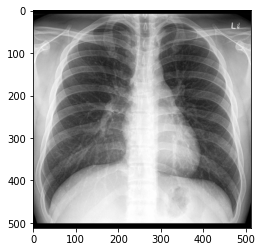

In [ ]:
image_array_gray = image_array[:,:,0]
plt.imshow(image_array_gray, cmap="gray");

You can see that the image looks the same. Note that matplotlib (`plt`) can show numpy arrays, but you have to specify the color map (the `cmap` argument). You can delete the color map and see what happens!

---


> **Exercise 5**: Look at different color-maps of matplotlib [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html), and try them on the image and see the results.


---

We will learn more about different kinds of medical imaging in *Chapter 5A*.

Now let's proceed to our last package, Pandas!

## 4.3. **Handling Tabular Data**

In the majority of your projects, you will have numeric or categorical data saved in a spreadsheet (e.g. excel or csv files). We must find a way to read and edit these kinds of data sources in Python. Here is where *Pandas* comes in. Pandas is a Python package designed to open, process, and save spreadsheets. Unlike excel or other spreadsheet viewers that have a graphical user interface, pandas exposes all of its functionalities using a few lines of code. This helps save your machine's memory for computation rather than using it to render the tables themselves, which in turn allows you to open and work with spreadsheets with tens of millions of cells. Let's first install pandas in our **MIDEL environment**:

```
pip install pandas==0.25.0
```

---


> **Note**: If you are viewing this chapter in Colab, these packages are already installed and you can skip the `pip install` command.


---

First, let's download a sample excel file:

In [ ]:
file_url = "https://drive.google.com/uc?id=1vgrc4WMmOOAc4jCctM69fjqUr4qFqb9k&export=download"
file_name = "sample_spreadsheet.excel"
gdown.download(file_url, file_name, quiet=True)

'sample_spreadsheet.excel'

Now we can load the contents of this file into a pandas **DataFrame**:

In [ ]:
import pandas as pd   # by convention we import pandas as pd

sample_df = pd.read_excel(file_name)
sample_df.head(7)

,PatientID,Modality,Gender,Age
0,10123,DR,Male,27
1,10124,DR,Female,28
2,10126,MRI,Male,73
3,12456,DR,Female,61
4,16789,MRI,Male,45
5,13029,DR,Female,54
6,10235,MRI,Male,18


As you see, opening an excel file can be done with a single line of code. In pandas terminology, a table is called a **DataFrame** (containing 2 dimensional data) *(typically shortened as df as in sample_df)* and every single column/row is a **Series** (containing 1 dimensional data). You can view the first 5 rows of a dataframe by using its `.head()` method. By default it will show the first 5 rows, but you can pass any integer  to dislay your preferred number of rows.

If you open the Excel file with a spreadsheet viewer you see that columns start from 'PatientID', but pandas added the first column and numbered the rows from zero, called the *index column*.

You can use this index to get a specific row:

In [ ]:
sample_df.iloc[0]   # viewing the row information of the first patient

PatientID    10123
Modality        DR
Gender        Male
Age             27
Name: 0, dtype: object

You can also visualize one or more specific columns by passing a list of column names:

In [ ]:
sample_df[['PatientID','Age']]   # passing a list of column names as indices of a dataframe

,PatientID,Age
0,10123,27
1,10124,28
2,10126,73
3,12456,61
4,16789,45
5,13029,54
6,10235,18
7,90381,34
8,11023,46
9,12058,81


You can also mix and match these approaches:

In [ ]:
sample_df[['PatientID','Age']].iloc[[0,1]]   # same as sample_df.iloc[0][['PatientID','Age']]

,PatientID,Age
0,10123,27
1,10124,28


One powerful feature of pandas that comes in handy during your data selection process is filtering. Imagine that we want to get rows that are related to female patients who are older than 40 years or younger than 30 years:

In [ ]:
sample_df[(sample_df['Gender']=="Female") & ((sample_df['Age']>40) | (sample_df['Age']<30))]   # '&' used as AND, '|' used as OR

,PatientID,Modality,Gender,Age
1,10124,DR,Female,28
3,12456,DR,Female,61
5,13029,DR,Female,54
9,12058,MRI,Female,81


Let's break this statement up to better understand it:

In [ ]:
sample_df['Gender']=="Female"

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
Name: Gender, dtype: bool

You can see that by checking if the 'Gender' column's value equals "Female" we get either `True` or `False` for each of the rows. We can combine these boolean values with `&`*(AND)* or `|`*(OR)* operators. Don't forget the *parenthesis* between each comparison phrase. We can now *mask* our original dataframe to get the rows that are `True`.

You can also use pandas to change cell values. Let's create a column and set it to missing values. Pandas uses numpy in the backend, so you can specify missing values as `np.nan`:

In [ ]:
sample_df["Selected"] = np.nan
sample_df.head()

,PatientID,Modality,Gender,Age,Selected
0,10123,DR,Male,27,NaN
1,10124,DR,Female,28,NaN
2,10126,MRI,Male,73,NaN
3,12456,DR,Female,61,NaN
4,16789,MRI,Male,45,NaN


Now let's update the "Selected" column to `1` for female patients older than 40 or younger than 30 and set it to `0` for the rest:

In [ ]:
sample_df.loc[(sample_df['Gender']=="Female") & ((sample_df['Age']>40) | (sample_df['Age']<30)), "Selected"] = 1
sample_df.loc[(sample_df['Selected']!=1), "Selected"] = 0
sample_df

,PatientID,Modality,Gender,Age,Selected
0,10123,DR,Male,27,0.0
1,10124,DR,Female,28,1.0
2,10126,MRI,Male,73,0.0
3,12456,DR,Female,61,1.0
4,16789,MRI,Male,45,0.0
5,13029,DR,Female,54,1.0
6,10235,MRI,Male,18,0.0
7,90381,MRI,Female,34,0.0
8,11023,DR,Male,46,0.0
9,12058,MRI,Female,81,1.0


As you see, we use the `.loc[]` method and pass the row mask as the first argument and the intended column as the second argument. We then set a value to be assigned to this `.loc[]` statement.

---


> **Exercise 6**: Update the *Selected* column to `1` for female patients with MRI, `2` for male patients with MRI, and `0` for the rest of the patients.


---

Now that we have made some changes to our dataframe, let's save it:

In [ ]:
sample_df.to_csv("new_sample_csv.csv", index=False)      # for saving to csv format; we set index=False in order to not save the index column
sample_df.to_excel("new_sample_xlsx.xlsx", index=False)  # for saving to excel format; we set index=False in order to not save the index column

After saving our dataframe we can proceed to the last part of this chapter!

# 5. **Integrated Terminal**

As you saw, there are some instances where you must switch to a terminal window to install a package or change the directory. But there are two tricks that can help you access the terminal directly from the notebook cells.

You can create a code cell and type `!` and the terminal command you want to execute in that cell and run it. For example, the following command installs a package called "*tqdm*". *tqdm* is a package for showing progress bars in python. We will use it in future chapters of this series.

In [ ]:
!pip install tqdm

You just installed this package without leaving our notebook! Let's see another example:

In [ ]:
!ls

age_meter.pickle    new_sample_xlsx.xlsx  sample_image_small.png
drive		    sample_cxr.jpg	  sample_spreadsheet.excel
new_sample_csv.csv  sample_data


`ls` is a terminal command that shows the files in your current working directory. By default, when you start your local jupyter notebook the current working directory is set to the folder in which your notebook is located. For colab notebooks, it is set to "*/content*". You can check your current working directory using:

In [ ]:
!pwd     # linux/macOS; short for print working directory
!cd      # windows; short for change directory

/content


This working directory is very important because all your paths must be relative to this directory or your code will not work. Imagine your project structure is like this:

```
+ MIDEL Project
------ + Images
------------ image1.png
------------ image2.png
------------ ...
------ + Notebooks
------------ training.ipynb
```

If your current working directory is `/MIDEL Project/Notebooks`, then you should open your images using a path like `../Images/image1.png` *(`../` means go up one level)*. But if your working directory is `/MIDEL Project` your image paths would be `./Images/image1.png` *(`./` means start from the current working directory)*.

To change your current working directory, you can use **magic commands**. Magic commands are specific to notebooks and can be easily recognized as they start with `%`. You can find a list of all magic commands in *Part 6* of this chapter. We will mostly work with only a couple of them. 

You can use `%cd` to change to the current working directory of your notebook:

In [ ]:
%cd ../

/


You can see that the new working directory is shown to you after executing the cell. You can also check it again using `!pwd` or `!cd' *(if using windows)*.

---


> **Exercise 7**: After changing your working directory, try to display the *sample_cxr.jpg* image that you downloaded earlier.


---

One more magic command we want to use in our code is:

```
%matplotlib inline
```

This command is usually put after importing matplotlib and makes graphs and images display properly in a notebook environment.

# 6. **Summary and Further Reading**

In this chapter, we reviewed the advantages of Colab notebooks and learned how to code in them. To consolidate your understanding of the notebook environment and especially Colab notebooks, you can read [this tutorial](https://www.tutorialspoint.com/google_colab/index.htm).

We also reviewed some Python coding practices and installed a couple of useful packages in our local environment. Here are some of the resources that we think might be helpful for further reading:

*   [Python 3 documentation](https://docs.python.org/3/): This contains a tutorial, language reference, and other resources from the official Python website.

*   [Python 4 Everyone (PY4E)](https://www.py4e.com/book): This is a free book that explains Python 3 functionalities with examples and practical challenges. 

*   [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781449323592/): This is a book from the creator of Pandas that goes through details of how to better use Numpy and Pandas for data analysis.


*   [Conda Cheatsheet](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf): A 2-page list of all you can do with conda.

*   [Notebook Magic Commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html): Complete list of magic commands that can be used in jupyter and colab notebooks.


`TO BE COMPLETED...`